In [1]:
import numpy as np 
import pandas as pd

In [2]:
tahoe = pd.read_csv("/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Tahoe_analysis/Tahoe_voom_exp_final.csv", index_col=0)

In [3]:
tahoe.head()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ENSG00000291308,LY6S,ENSG00000291310,ENSG00000291312,ENSG00000291313,ENSG00000291314,ENSG00000291315,ENSG00000291316,TMEM276,clean_id
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
DMSO_Plate_7_CVCL_0023,3.516558,-2.787223,6.527926,2.994137,4.201462,-2.787223,2.257171,4.525660,6.568128,4.696593,...,-2.787223,-2.787223,-2.787223,-2.787223,-2.787223,-2.787223,-2.787223,-1.202261,2.827487,DMSO_CVCL_0023
Erlotinib_0.05_CVCL_0023,2.950206,-2.722219,6.916216,3.617631,4.457690,-1.137257,2.487234,4.590663,6.445199,5.039332,...,-2.722219,-1.137257,-2.722219,-2.722219,-2.722219,-2.722219,-2.722219,-2.722219,2.407064,Erlotinib_0.05_CVCL_0023
DMSO_Plate_7_CVCL_0028,4.858139,-0.756571,6.185944,2.413354,4.858139,-0.756571,1.565357,5.510216,6.592157,6.185944,...,-0.756571,-0.756571,-0.756571,-0.756571,-0.756571,-0.756571,-0.756571,-0.756571,2.413354,DMSO_CVCL_0028
Erlotinib_0.05_CVCL_0028,4.638300,-0.219681,6.189710,2.950244,4.424175,-0.219681,-0.219681,5.662962,6.600498,6.699182,...,-0.219681,-0.219681,-0.219681,-0.219681,-0.219681,-0.219681,-0.219681,-0.219681,1.365281,Erlotinib_0.05_CVCL_0028
DMSO_Plate_7_CVCL_0069,2.587870,-2.769682,6.850537,3.738112,4.349259,-2.769682,3.338842,5.031217,5.291013,4.449486,...,-2.769682,-2.769682,-2.769682,-2.769682,-2.769682,-2.769682,-2.769682,-2.769682,2.088299,DMSO_CVCL_0069


In [4]:
df_dmso = tahoe[tahoe.index.str.contains("DMSO")].copy()

In [5]:
df_dmso["cell_line"] = df_dmso.index.to_series().str.extract(r"(CVCL_[A-Za-z0-9]+)")


In [6]:
cols = ["cell_line"] + [c for c in df_dmso.columns if c != "cell_line"]
df_dmso = df_dmso[cols]


In [7]:
df_dmso["plate"] = (
    df_dmso.index
           .to_series()
           .str.extract(r"(Plate_\d+)")
)


In [8]:
cols = ["plate"] + [c for c in df_dmso.columns if c != "plate"]
df_dmso = df_dmso[cols]

In [9]:
df_dmso.head()

,plate,cell_line,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,...,ENSG00000291308,LY6S,ENSG00000291310,ENSG00000291312,ENSG00000291313,ENSG00000291314,ENSG00000291315,ENSG00000291316,TMEM276,clean_id
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
DMSO_Plate_7_CVCL_0023,Plate_7,CVCL_0023,3.516558,-2.787223,6.527926,2.994137,4.201462,-2.787223,2.257171,4.525660,...,-2.787223,-2.787223,-2.787223,-2.787223,-2.787223,-2.787223,-2.787223,-1.202261,2.827487,DMSO_CVCL_0023
DMSO_Plate_7_CVCL_0028,Plate_7,CVCL_0028,4.858139,-0.756571,6.185944,2.413354,4.858139,-0.756571,1.565357,5.510216,...,-0.756571,-0.756571,-0.756571,-0.756571,-0.756571,-0.756571,-0.756571,-0.756571,2.413354,DMSO_CVCL_0028
DMSO_Plate_7_CVCL_0069,Plate_7,CVCL_0069,2.587870,-2.769682,6.850537,3.738112,4.349259,-2.769682,3.338842,5.031217,...,-2.769682,-2.769682,-2.769682,-2.769682,-2.769682,-2.769682,-2.769682,-2.769682,2.088299,DMSO_CVCL_0069
DMSO_Plate_7_CVCL_0099,Plate_7,CVCL_0099,2.441225,-2.082337,6.809447,3.750553,3.750553,-2.082337,6.445140,6.112420,...,-2.082337,-2.082337,-2.082337,-2.082337,-2.082337,-2.082337,-2.082337,-2.082337,-0.497375,DMSO_CVCL_0099
DMSO_Plate_7_CVCL_0131,Plate_7,CVCL_0131,-0.743316,-2.328279,6.191357,3.226310,4.358222,-2.328279,1.578612,4.590584,...,-2.328279,-2.328279,-2.328279,-2.328279,-2.328279,-2.328279,-2.328279,-0.743316,2.716115,DMSO_CVCL_0131


In [10]:
df_dmso_clean = (
    df_dmso
        .reset_index(drop=True)   # removes "Unnamed: 0" index
        .drop(columns=["clean_id"])
)


In [11]:
model = pd.read_csv("/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Model_24_Q4.csv")

In [12]:
model.head()

,ModelID,PatientID,CellLineName,StrippedCellLineName,DepmapModelType,OncotreeLineage,OncotreePrimaryDisease,OncotreeSubtype,OncotreeCode,PatientSubtypeFeatures,...,EngineeredModelDetails,CulturedResistanceDrug,PublicComments,CCLEName,HCMIID,ModelAvailableInDbgap,ModelSubtypeFeatures,WTSIMasterCellID,SangerModelID,COSMICID
0,ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,HGSOC,Ovary/Fallopian Tube,Ovarian Epithelial Tumor,High-Grade Serous Ovarian Cancer,HGSOC,NaN,...,NaN,NaN,NaN,NIHOVCAR3_OVARY,NaN,Available in SRA,NaN,2201.0,SIDM00105,905933.0
1,ACH-000002,PT-5qa3uk,HL-60,HL60,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"TP53(del), CDKN2A and NRAS mutations [PubMed=2...",...,NaN,NaN,NaN,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,Available in SRA,NaN,55.0,SIDM00829,905938.0
2,ACH-000003,PT-puKIyc,CACO2,CACO2,COAD,Bowel,Colorectal Adenocarcinoma,Colon Adenocarcinoma,COAD,NaN,...,NaN,NaN,NaN,CACO2_LARGE_INTESTINE,NaN,Available in SRA,NaN,NaN,SIDM00891,NaN
3,ACH-000004,PT-q4K2cp,HEL,HEL,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"JAK2 and TP53 mutations,",...,NaN,NaN,NaN,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,Available in SRA,NaN,783.0,SIDM00594,907053.0
4,ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,JAK2 and TP53 mutations,...,NaN,NaN,NaN,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,Available in SRA,NaN,NaN,SIDM00593,NaN


In [13]:
model_map = model[["RRID", "StrippedCellLineName"]].drop_duplicates()

In [14]:
df_dmso_clean = df_dmso_clean.merge(
    model_map,
    left_on="cell_line",
    right_on="RRID",
    how="left"
)


In [15]:
cols = ["StrippedCellLineName"] + [c for c in df_dmso_clean.columns if c != "StrippedCellLineName"]
df_dmso_clean = df_dmso_clean[cols]

In [16]:
df_dmso_clean = df_dmso_clean.drop(columns=["RRID"])


In [17]:
# How many cell lines failed to map?
df_dmso_clean["StrippedCellLineName"].isna().sum()


np.int64(3)

In [18]:
df_dmso_clean = df_dmso_clean.dropna(subset=["StrippedCellLineName"])



In [19]:
Ic50 = pd.read_csv("/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Fresh_FORGE/Data/Creammist_common_ic50.csv", index_col=0)

In [20]:
Ic50.head()

,1321N1,2004,22RV1,2313287,253J,253JBV,42MGBA,451LU,5637,639V,...,YD10B,YD15,YD38,YD8,YH13,YKG1,YMB1E,YT,ZR751,ZR7530
drug,,,,,,,,,,,,,,,,,,,,,
ABIRATERONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.67829,NaN,NaN,NaN,NaN,5.84745,NaN
ABT-751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.899170,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFATINIB,NaN,1.47,2.80303,1.54454,0.28527,1.44631,2.59555,4.03959,-0.082677,2.51988,...,-5.26158,-2.81338,-3.85876,NaN,2.82189,3.96671,2.836040,2.38864,2.79599,-3.31245
AFURESERTIB,NaN,NaN,2.11144,1.40029,NaN,NaN,1.29770,4.46337,5.424960,4.97438,...,NaN,NaN,NaN,NaN,4.30362,5.06393,-0.983684,1.67375,NaN,3.62934
ALECTINIB,NaN,NaN,4.80222,3.94753,NaN,NaN,4.80889,4.70821,5.056080,4.09390,...,NaN,NaN,NaN,NaN,4.39350,3.48317,4.389940,3.03112,NaN,2.24762


### Benefit Score vs IC50 Plot 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import re
from scipy.stats import zscore

# ==========================================
# 1. Configuration & Data Loading
# ==========================================
FILE_PATH = '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Tahoe_analysis/Tahoe_voom_exp_final.csv'
WEIGHTS_PATH = '/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/git_repo/Data/EGFR_ERLOTINIB_geneImp_optuna.csv'

# Load Expression Data
df = pd.read_csv(FILE_PATH)

# Set index and drop 'clean_id' as requested
if 'Unnamed: 0' in df.columns:
    df.set_index('Unnamed: 0', inplace=True)

if 'clean_id' in df.columns:
    df.drop(columns=['clean_id'], inplace=True)
    
alias_map = {
    'ENSG00000253102': 'LRRC59-AS1',
    'ENSG00000228925': 'MCFD2-AS1',
    'ENSG00000241073': 'MFSD14A-AS1',
    'ENSG00000227741': 'PEA15-AS1',
    'KIAA1522': 'NHSL3'
}

print(f"Total columns before mapping: {df.shape[1]}")

# Rename the columns
df = df.rename(columns=alias_map)

# Ensure all data is numeric (genes only)
df = df.select_dtypes(include=[np.number])

# ==========================================
# 2. Metadata Parsing
# ==========================================
# Map concentrations to plate numbers
conc_map = {
    '0.05': 'Plate_7',
    '0.5':  'Plate_8',
    '5':    'Plate_9'
}

def parse_sample_info(sample_id):
    """
    Parses index strings like:
    - DMSO_Plate_7_CVCL_0023
    - Erlotinib_0.05_CVCL_0023
    """
    # Case 1: DMSO (contains explicit plate info)
    # Regex looks for: DMSO_Plate_(number)_(CellLine)
    dmso_match = re.search(r'DMSO_Plate_(\d+)_(CVCL_[A-Za-z0-9]+)', sample_id)
    if dmso_match:
        plate_num = dmso_match.group(1)
        return {
            'sample_id': sample_id,
            'treatment': 'DMSO',
            'plate': f'Plate_{plate_num}',
            'conc': 0,
            'cell_line': dmso_match.group(2)
        }

    # Case 2: Erlotinib (contains concentration, implies plate)
    # Regex looks for: Erlotinib_(conc)_(CellLine)
    drug_match = re.search(r'Erlotinib_([0-9\.]+)_(CVCL_[A-Za-z0-9]+)', sample_id)
    if drug_match:
        conc_str = drug_match.group(1)
        return {
            'sample_id': sample_id,
            'treatment': 'Erlotinib',
            'plate': conc_map.get(conc_str, 'Unknown'),
            'conc': float(conc_str),
            'cell_line': drug_match.group(2)
        }
    
    return {'sample_id': sample_id, 'treatment': 'Unknown', 'plate': 'Unknown', 'cell_line': 'Unknown'}

# Create Metadata DataFrame
meta_list = [parse_sample_info(idx) for idx in df.index]
metadata = pd.DataFrame(meta_list).set_index('sample_id')

# ==========================================
# 3. Compute Tahoe Benefit Score (DMSO only)
# ==========================================
print("Computing Benefit Scores...")

try:
    gene_weights = pd.read_csv(WEIGHTS_PATH, index_col=0)
    # Assume weights are in the first column if not named explicitly
    weight_col = 'scaled_combined' if 'scaled_combined' in gene_weights.columns else gene_weights.columns[0]
    weights = gene_weights[weight_col]
    
    # Intersection of genes
    common_genes = df.columns.intersection(weights.index)
    print(f"  > Genes used for scoring: {len(common_genes)}")
    
    if len(common_genes) == 0:
        raise ValueError("No overlapping genes found between data and weight file.")

    # Filter data and weights
    weights_aligned = weights.loc[common_genes]
    
    # 1. Get all DMSO samples
    dmso_samples = metadata[metadata['treatment'] == 'DMSO'].index
    dmso_expression = df.loc[dmso_samples, common_genes]
    
    # 2. Calculate raw scores (Dot Product)
    raw_scores = dmso_expression.dot(weights_aligned)
    
    # 3. Add Cell Line info to average
    score_df = pd.DataFrame(raw_scores, columns=['score'])
    score_df['cell_line'] = metadata.loc[dmso_samples, 'cell_line']
    
    # 4. Average score per cell line (across plates) as requested
    avg_benefit_scores = score_df.groupby('cell_line')['score'].mean()
    
    # 5. Define Categories (High vs Low) based on Median
    median_score = avg_benefit_scores.median()
    benefit_map = avg_benefit_scores.apply(lambda x: 'High Score' if x > median_score else 'Low Score')

except FileNotFoundError:
    print("  > Weight file not found! Generating DUMMY scores for testing.")
    unique_cells = metadata['cell_line'].unique()
    benefit_map = pd.Series(
        np.random.choice(['High Score', 'Low Score'], size=len(unique_cells)),
        index=unique_cells
    )

Total columns before mapping: 62710
Computing Benefit Scores...
  > Genes used for scoring: 187


Number of cell lines matching between Tahoe and IC50: 46


/tmp/ipykernel_1721230/1192860410.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


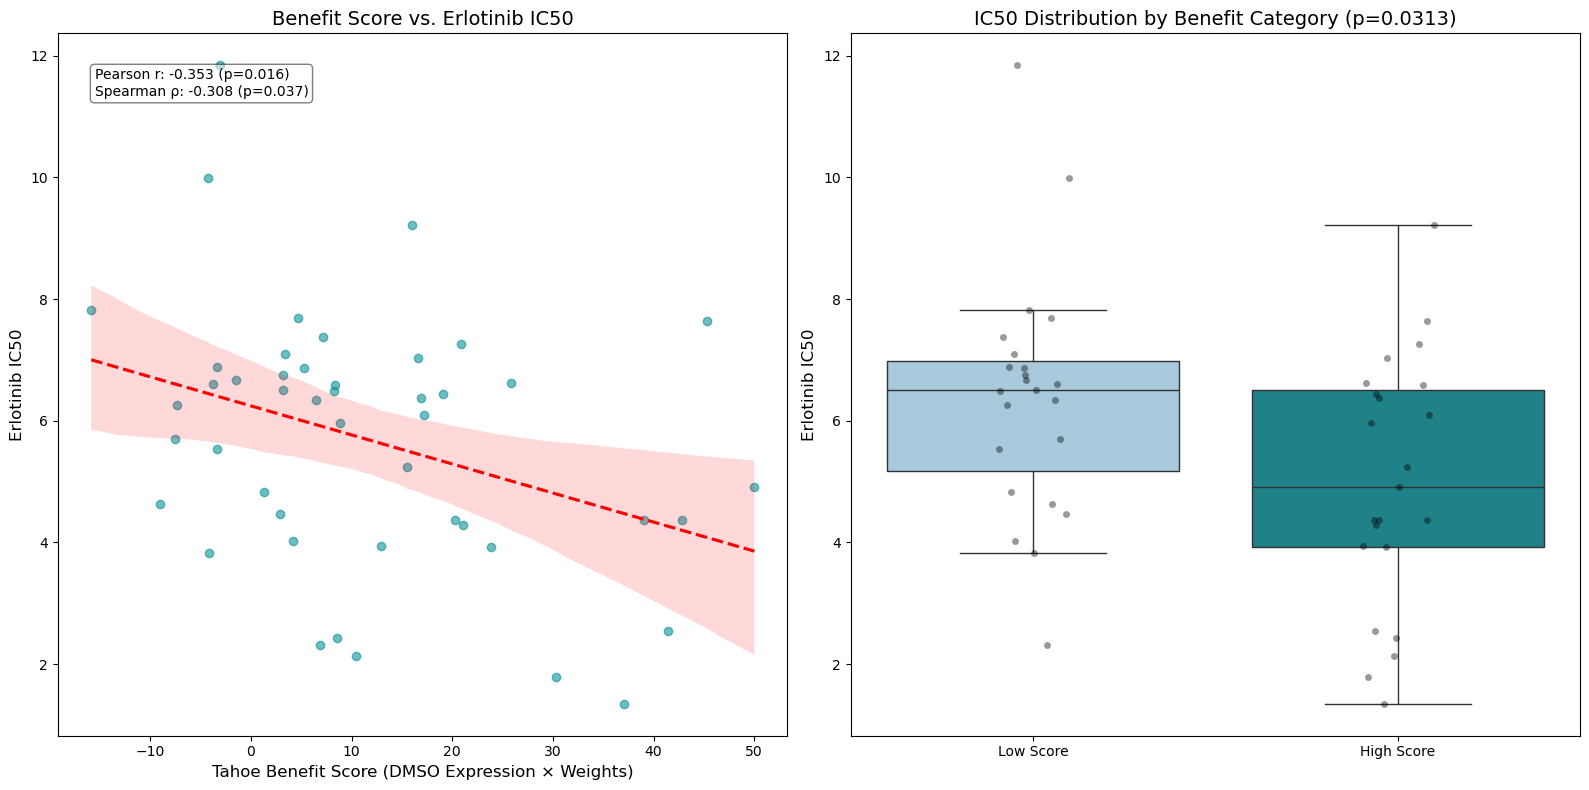

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, mannwhitneyu

# ==========================================
# 1. Prepare Data Alignment
# ==========================================

# A. Create a mapping between CVCL ID and Stripped Name from the Tahoe Data
# (Based on the snippet you provided)
name_mapping = df_dmso_clean[['cell_line', 'StrippedCellLineName']].drop_duplicates()
name_mapping = name_mapping.set_index('cell_line')['StrippedCellLineName']

# B. Extract Erlotinib IC50 values
# Assuming index is drug names and columns are stripped cell line names
erlotinib_ic50 = Ic50.loc['ERLOTINIB'].dropna()

# C. Convert Average Benefit Scores (from previous step) to a DataFrame
# avg_benefit_scores was indexed by CVCL ID
benefit_df = avg_benefit_scores.to_frame(name='benefit_score')
benefit_df['StrippedCellLineName'] = benefit_df.index.map(name_mapping)

# D. Merge Benefit Scores with IC50 values
# We join on the Stripped Name
comparison_df = benefit_df.merge(
    erlotinib_ic50.to_frame(name='ic50'), 
    left_on='StrippedCellLineName', 
    right_index=True, 
    how='inner'
)

# E. Re-calculate Categories based on the median of this specific overlap
median_val = comparison_df['benefit_score'].median()
comparison_df['Category'] = comparison_df['benefit_score'].apply(
    lambda x: 'High Score' if x > median_val else 'Low Score'
)

print(f"Number of cell lines matching between Tahoe and IC50: {len(comparison_df)}")

# ==========================================
# 2. Visualization
# ==========================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# --- Plot 1: Scatter Plot (Correlation) ---
sns.regplot(
    data=comparison_df, 
    x='benefit_score', 
    y='ic50', 
    ax=ax1, 
    scatter_kws={'alpha':0.6, 'color':'#0c919a'},
    line_kws={'color':'red', 'linestyle':'--'}
)

# Calculate Correlations
p_corr, p_pval = pearsonr(comparison_df['benefit_score'], comparison_df['ic50'])
s_corr, s_pval = spearmanr(comparison_df['benefit_score'], comparison_df['ic50'])

corr_text = f"Pearson r: {p_corr:.3f} (p={p_pval:.3f})\nSpearman ρ: {s_corr:.3f} (p={s_pval:.3f})"
ax1.text(0.05, 0.95, corr_text, transform=ax1.transAxes, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

ax1.set_title('Benefit Score vs. Erlotinib IC50', fontsize=14)
ax1.set_xlabel('Tahoe Benefit Score (DMSO Expression × Weights)', fontsize=12)
ax1.set_ylabel('Erlotinib IC50', fontsize=12)

# --- Plot 2: Boxplot (Categorical Difference) ---
palette = {'High Score': '#0c919a', 'Low Score': '#9fcae3'}
sns.boxplot(
    data=comparison_df, 
    x='Category', 
    y='ic50', 
    order=['Low Score', 'High Score'],
    palette=palette, 
    ax=ax2, 
    showfliers=False
)
sns.stripplot(
    data=comparison_df, 
    x='Category', 
    y='ic50', 
    order=['Low Score', 'High Score'],
    color='black', 
    alpha=0.4, 
    ax=ax2
)

# Statistical Test (Mann-Whitney U)
high_vals = comparison_df[comparison_df['Category'] == 'High Score']['ic50']
low_vals = comparison_df[comparison_df['Category'] == 'Low Score']['ic50']
u_stat, u_pval = mannwhitneyu(high_vals, low_vals, alternative='two-sided')

ax2.set_title(f'IC50 Distribution by Benefit Category (p={u_pval:.4f})', fontsize=14)
ax2.set_ylabel('Erlotinib IC50', fontsize=12)
ax2.set_xlabel('')

plt.tight_layout()
plt.show()

# Optional: Save the merged data for inspection
# comparison_df.to_csv("tahoe_vs_ic50_erlotinib.csv")